# What drives the price of a car?

![](kurt.jpeg)

### OVERVIEW

In this application, we will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The dataset we will use contains information on 426K cars to ensure speed of processing.  Our goal is to understand what factors make a car more or less expensive.  As a result of our analysis, we should be able to provide clear recommendations to our client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Our first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, we will answer the questions below.

### Business Understanding
Our client, a used car dealership, seeks to understand the key factors influencing used car prices to optimize their inventory and pricing strategy. To address this business need, we can reframe the task as a data-driven problem.

This challenge can be formulated as a supervised machine learning task, specifically a regression problem. Our objective is to develop a predictive model that estimates the price of a used car (the target variable) based on various features or attributes (independent variables). The model will help identify the most significant factors affecting car prices. Key components of this data-driven approach include:

1. Exploratory Data Analysis (EDA) to understand the relationships between different variables and the target variable (price).
2. Feature engineering to identify the most influential factors affecting car prices.
3. Building and comparing multiple models to predict car prices.
4. Evaluating model performance using appropriate metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R-squared (R²).
5. Validating the models using cross-validation techniques to ensure generalizability.
6. Interpreting the model coefficients or feature importances to determine which factors have the strongest impact on used car prices.

This way, we can provide data-driven insights to the used car dealership about the key factors influencing car prices, which would enable them to make informed decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  More specifically, we would take appropriate steps to get to know the dataset, explore what information it contains, identify any quality issues within and how this could be used to inform our business understanding.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load and Inspect the Dataset
To get an initial sense of the data, we will take a look at few rows of the dataset. This will help us understand the structure and some sample entries in the dataset.

In [9]:
df = pd.read_csv('vehicles.csv')
print(f'Shape of the dataset: {df.shape}')
df.sample(5)

Shape of the dataset: (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
351724,7314796357,chattanooga,28995,2012.0,ford,econoline commercial,NaN,NaN,gas,93923.0,clean,automatic,1FC3E3KL4CDB34837,NaN,NaN,NaN,white,tn
155848,7314820570,cedar rapids,20988,2016.0,mazda,cx-5 touring,NaN,4 cylinders,gas,20197.0,clean,automatic,JM3KE4CY1G0632705,4wd,NaN,SUV,black,ia
374691,7316499872,houston,35000,2015.0,gmc,sierra 1500 slt,excellent,8 cylinders,gas,107250.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,tx
298246,7315365379,dayton / springfield,9999,2013.0,nissan,juke,NaN,NaN,gas,112639.0,clean,automatic,JN8AF5MVXDT216582,4wd,compact,wagon,NaN,oh
139313,7303957465,twin falls,18988,2014.0,gmc,yukon,good,8 cylinders,gas,173618.0,clean,automatic,1GKS2EEF1ER134519,4wd,full-size,SUV,grey,id


#### 2. Examine Basic Structure of the Dataset
In this section we will try to understand the basic structure of the dataset such as column data types including non-null counts and numerical and categorical features.

In [11]:
# Overview of column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Observation
The dataset contains 426,880 rows and 18 columns and includes both numerical and categorical data types.

In [13]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Observations
* 'price' ranges from 0 to 3,736,929,000, with a mean of 75,199. The minimum and maximum value seems unrealistic and could be an error.
* 'year' ranges from 1900 to 2022, with a median of 2013.
* 'odometer' ranges from 0 to 10,000,000, with a median of 85,548. Again, the maximum value seems unrealistic.

We will further explore this by looking at the outliers later in data cleaning section.

In [15]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for region:
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

Value counts for manufacturer:
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427


#### Observations
* 'region' has 404 unique values, which might be too granular for our modeling purposes.
* 'manufacturer' shows Ford, Chevrolet, and Toyota as the top brands.
* 'fuel' is predominantly gas, with some diesel, hybrid, and electric vehicles.
* 'transmission' is mostly automatic, with some manual and 'other' categories.

#### 3. Identify Duplicate and Missing Values

In [18]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [19]:
# Check for missing values
print('Missing values:')
df.isnull().sum()

Missing values:


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### Observations
* No duplicate rows were found.
* Several columns have a significant number of missing values.
  
In the next section, we will clean and prepare our data for further analysis.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### 1. Data Cleaning
In this section, first we will examine each column, decide on its relevance for our analysis, and then strategize on how to handle missing values. Finally, we will identify and handle any outliers.

In [23]:
# Drop columns that are not relevant for price prediction
columns_to_drop = ['id', 'region', 'VIN', 'size']
df = df.drop(columns=columns_to_drop)

In [24]:
# Drop rows with missing values that are < 5% of the entire dataset
threshold = 0.05 * len(df)

# Identify columns with less than 5% missing values
columns_to_check = df.columns[df.isnull().sum() < threshold].tolist()

# Drop rows with missing values in these columns
df = df.dropna(subset=columns_to_check)

In [25]:
# Rows with missing values that are > 5% of the entire dataset, fill with 'unknown'
# Identify columns with greater than 5% missing values
columns_to_fill_unknown = df.columns[df.isnull().sum() > threshold].tolist()

for column in columns_to_fill_unknown:
    df[column] = df[column].fillna('unknown')

In [26]:
# Convert 'year' to integer
df['year'] = df['year'].astype(int)

Next, we will identify unrealistic values in 'price' and 'odometer' using percentiles to define our bounds. Basically, we will remove data points below the 1st percentile and above the 99th percentile, keeping 98% of our data. Capping the outliers, might not be the best approach in our case, especially for luxury or high-end vehicles that legitimately have higher prices. 

In [28]:
# Function to identify and remove outliers
def handle_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    print(f"\nFor {column}:")
    print(f"Lower bound ({lower_percentile} percentile): {lower_bound}")
    print(f"Upper bound ({upper_percentile} percentile): {upper_bound}")
    print(f"Values below lower bound: {(df[column] < lower_bound).sum()}")
    print(f"Values above upper bound: {(df[column] > upper_bound).sum()}")
    
    # Remove extreme outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [29]:
# Create boxplots before and after the outlier treatment
def plot_distribution(df, column, before, after):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(before, kde=True)
    plt.title(f'Distribution of {column} before')
    plt.xlabel(column)
    
    plt.subplot(1, 2, 2)
    sns.histplot(after, kde=True)
    plt.title(f'Distribution of {column} after')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

In [30]:
# Remove extreme prices
df = df[(df['price'] >= 500) & (df['price'] <= 1000000)]  


For price:
Lower bound (0.01 percentile): 1000.0
Upper bound (0.99 percentile): 65999.0
Values below lower bound: 3190
Values above upper bound: 3530


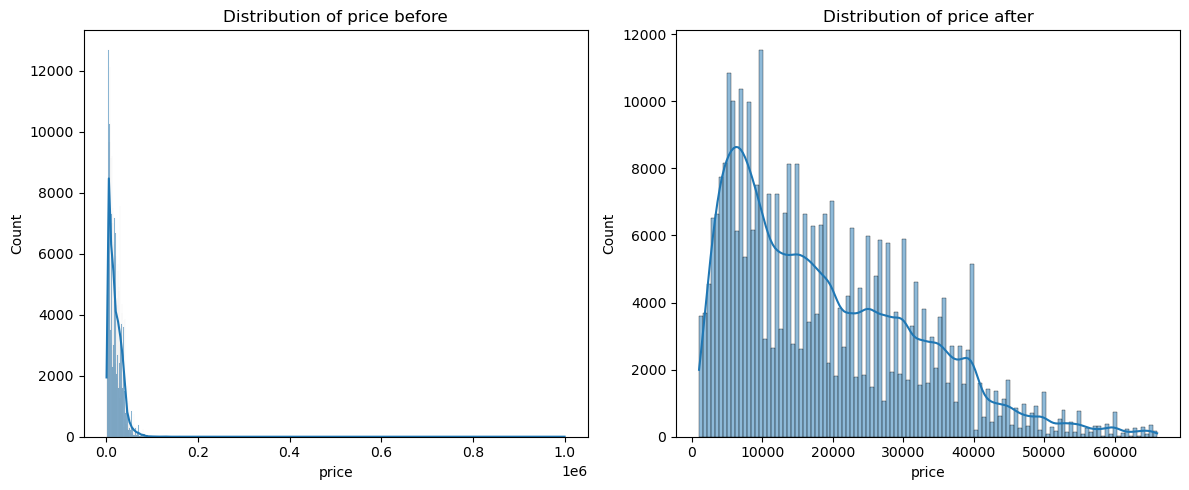


For odometer:
Lower bound (0.01 percentile): 106.0
Upper bound (0.99 percentile): 267294.33
Values below lower bound: 3465
Values above upper bound: 3467


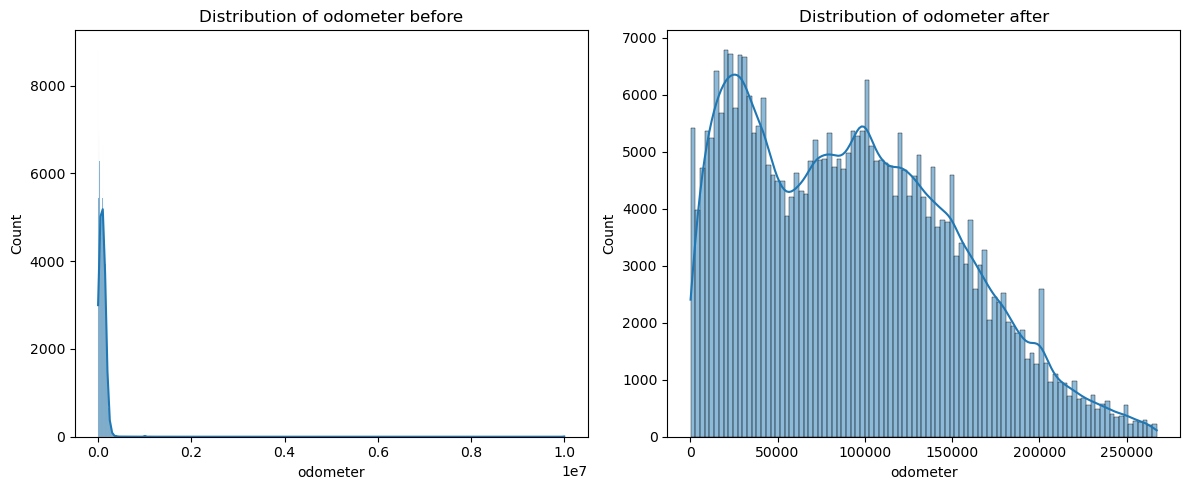

In [31]:
# Apply the function to 'price' and 'odometer'
for column in ['price', 'odometer']:
    # Store the original data
    original_data = df[column].copy()
    
    # Handle outliers
    df = handle_outliers(df, column)

    plot_distribution(df, column, original_data, df[column])

#### Observations
1. **Initial Distributions:**
    * Both price and odometer distributions were highly right-skewed with extremely long tails.
    * Unrealistic values were present: prices up to 3.7 billion and odometer readings up to 10 million miles.
    * The majority of data points were concentrated in the lower ranges, but the scale of the x-axis made it difficult to see the details of the distributions.
      
2. **Cleaned Distributions:**
    * Both distributions remain right-skewed but are now more interpretable and realistic.
    * The bulk of prices fall between 1,000 and $40,000, while most odometer readings are between 20,000 and 150,000 miles.
    * Clearer patterns and multiple peaks are now visible in both distributions.

#### 2. Feature Engineering
In the feature engineering section, we will create new or transform existing features to enhance the performance of our models. The new features could help us capture hidden patterns or relationships within the data. In addition, we will convert categorical features into numerical ones because many machine learning algorithms require numerical input to work with.

First, we will create a 'car_age' feature by subtracting 'year' from the current year.

In [34]:
# Create 'car_age' feature
current_year = datetime.now().year
df['car_age'] = current_year - df['year']

Next, we will keep only the 100 most common models and group all others into an 'Other' category. The goal is to reduce the number of unique values in the 'model' column as they can be very specific, potentially leading to hundreds or thousands of unique values (29,649 in our case). This can cause issues in machine learning models, especially with categorical encoding.

In [36]:
# Group less frequent models
model_counts = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if x in model_counts.nlargest(100).index else 'Other')

In [37]:
# Print summary of the cleaned dataset
print(df.info())
print("\nMissing values after cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339736 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         339736 non-null  int64  
 1   year          339736 non-null  int32  
 2   manufacturer  339736 non-null  object 
 3   model         339736 non-null  object 
 4   condition     339736 non-null  object 
 5   cylinders     339736 non-null  object 
 6   fuel          339736 non-null  object 
 7   odometer      339736 non-null  float64
 8   title_status  339736 non-null  object 
 9   transmission  339736 non-null  object 
 10  drive         339736 non-null  object 
 11  type          339736 non-null  object 
 12  paint_color   339736 non-null  object 
 13  state         339736 non-null  object 
 14  car_age       339736 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(11)
memory usage: 38.9+ MB
None

Missing values after cleaning:
price           0
year       

#### Observation
The cleaned dataset now has 339,736 rows and 15 columns, with no missing values. This looks like a good foundation for further processing.

In [39]:
df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age
55306,9000,1999,chevrolet,camaro,good,8 cylinders,gas,139455.0,clean,manual,rwd,coupe,black,ca,25
335175,3995,2001,chevrolet,Other,good,6 cylinders,gas,167050.0,clean,automatic,4wd,mini-van,red,pa,23
33536,11340,2004,toyota,tacoma,unknown,unknown,gas,107524.0,clean,automatic,unknown,unknown,unknown,ca,20
42333,35950,2018,chevrolet,Other,excellent,8 cylinders,gas,102365.0,clean,automatic,4wd,truck,white,ca,6
108414,6500,2010,chrysler,Other,good,6 cylinders,gas,93000.0,clean,automatic,unknown,mini-van,unknown,fl,14


Lastly, we will use `OneHotEncoder()` to convert categorical features into numerical ones, then standardize them using `StandardScaler()` and we will use `ColumnTransformer()` to apply these steps.

In [41]:
# Encode categorical variables and apply scaling to numerical features
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_columns = ['year', 'odometer', 'car_age']

# Create the preprocessor
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

To prepare our data for modeling, we will split the data into training and testing sets and apply the preprocessor on the training data and transform both training and test data.

In [43]:
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Fit the preprocessor on the training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [45]:
# The data is now ready for modeling!
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed test data:", X_test_processed.shape)

Shape of processed training data: (271788, 257)
Shape of processed test data: (67948, 257)


### Modeling
With our dataset prepared and processed, we can now build and evaluate different regression models to predict used car prices. We will compare several models to determine which performs best for our task.

#### 1. Model Training and Evaluation Function
First, we will define a function to train models, make predictions, and evaluate their performance by calculating three key metrics:

* **Root Mean Square Error (RMSE):** Measures the standard deviation of the residuals (prediction errors), lower values indicate better fit and is in the same unit as the target variable (price).
* **R-squared (R2):** Represents the proportion of variance in the target that is predictable from the features and it ranges from 0 to 1, with 1 indicating perfect prediction.
* **Cross-validated RMSE:** Provides an estimate of how well the model is likely to perform on unseen data.

In [48]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    return rmse, r2, cv_rmse

#### 2. Model Selection and Training
We will choose three different types of models: Linear Regression, Decision Tree, and Random Forest as it provides a good range from simple (linear) to complex (ensemble) models.

* **Linear Regression:** A simple model that assumes a linear relationship between features and target
* **Decision Tree:** A non-linear model that makes decisions based on asking a series of questions
* **Random Forest:** An ensemble of decision trees, often providing better performance than a single tree

In [50]:
# Initialize models
models = {'Linear Regression': LinearRegression(),
          'Decision Tree': DecisionTreeRegressor(random_state=42),
          'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)}

In [51]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    rmse, r2, cv_rmse = train_and_evaluate(model, X_train_processed, X_test_processed, y_train, y_test)
    results[name] = {'RMSE': rmse, 'R2': r2, 'CV RMSE': cv_rmse}
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.2f}, CV RMSE: {cv_rmse:.2f}")


Training Linear Regression...
Linear Regression - RMSE: 7149.89, R2: 0.70, CV RMSE: 7192.92

Training Decision Tree...
Decision Tree - RMSE: 4586.72, R2: 0.88, CV RMSE: 4967.78

Training Random Forest...
Random Forest - RMSE: 3488.60, R2: 0.93, CV RMSE: 3752.15


In the next section, we will interpret the results and take a deeper look to gain insights into the factors influencing used car prices.

### Evaluation
In this section, we will assess the performance of our models and extract meaningful insights about the drivers of used car prices. We will review our findings in the context of our business objective: to provide valuable insights to used car dealers for fine-tuning their inventory.

#### 1. Initial Model Performance
We trained and evaluated three different models: Linear Regression, Decision Tree, and Random Forest. Here are the results:

In [55]:
# Print summary of results
print("\nModel Comparison:")
results_df = pd.DataFrame(results).T
print(results_df)

# Identify the best model based on test RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nBest model based on test RMSE: {best_model}")


Model Comparison:
                          RMSE        R2      CV RMSE
Linear Regression  7149.892903  0.699906  7192.924377
Decision Tree      4586.718552  0.876501  4967.779778
Random Forest      3488.602268  0.928557  3752.146480

Best model based on test RMSE: Random Forest


#### Observations
* Random Forest performed the best with an RMSE of 3488.60 and R² of 0.93 and Decision Tree was the second best with an RMSE of 4586.72 and R² of 0.88.
* Non-linear models such as Random Forest and Decision Tree performed much better than the linear model, which suggest that the relationship between the features and car prices are complex and non-linear.
* 3-fold cross-validation was used and the cross-validation RMSE scores are close to the test RMSE scores for all models, indicating good generalization. This means our models, particularly the Random Forest, are likely to perform well on new, unseen data.

#### 2. Grid Search for Random Forest Hyperparameters
Next, we will perform a grid search for the Random Forest model to find the best combination of hyperparameters.

In [58]:
# Grid Search for Random Forest Hyperparameters
print("Performing Grid Search for Random Forest...")
param_grid = {
    'n_estimators': [50, 100]}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Performing Grid Search for Random Forest...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'n_estimators': 100}


In [59]:
# Evaluate the best model
y_pred_rf = best_rf.predict(X_test_processed)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - RMSE: 3466.34, R2: 0.93


#### Observation
After tuning, the Random Forest performance improved slightly: RMSE of 3466.34, R² of 0.93. With more time and resources, we could expand the grid search to include more hyperparameters in the future.

#### 3. Feature Importance
Next we will examine feature importances to understand which factors are most influential in determining car prices based on our best model.

In [61]:
# Get feature names for numerical columns (they remain unchanged)
numeric_feature_names = numerical_columns

# Get feature names for categorical columns (they are expanded due to one-hot encoding)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine all feature names
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

In [62]:
# Get feature importances from the Random Forest model
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feature_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False).head(10)

In [63]:
print("\nTop 10 most important features:")
print(feature_imp)
feature_imp = feature_imp.sort_values('importance', ascending=True)


Top 10 most important features:
                   feature  importance
2                  car_age    0.266632
0                     year    0.189887
1                 odometer    0.112000
176              drive_fwd    0.081963
161            fuel_diesel    0.063953
158  cylinders_8 cylinders    0.025886
155  cylinders_4 cylinders    0.019324
175              drive_4wd    0.017889
187            type_pickup    0.009209
157  cylinders_6 cylinders    0.005975


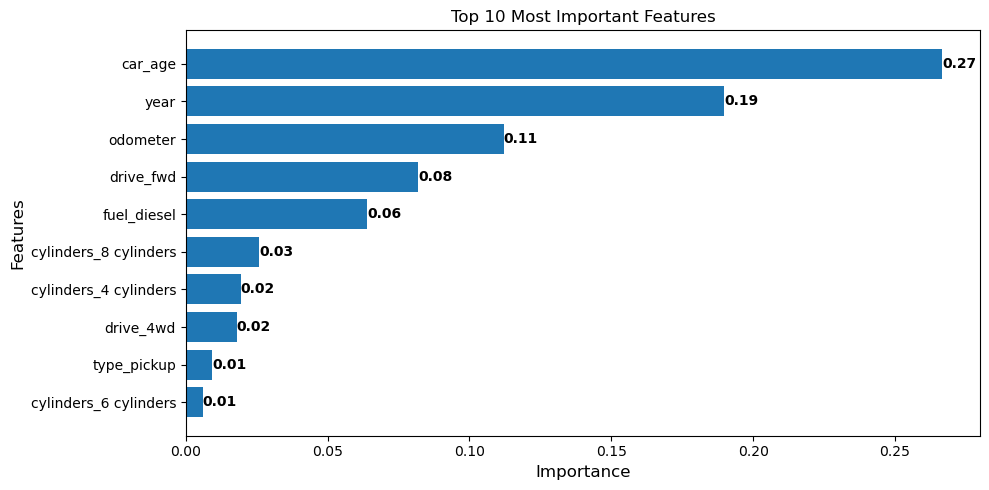

In [180]:
# Plot feature importances
plt.figure(figsize=(10, 5))
bars = plt.barh(feature_imp['feature'], feature_imp['importance'])
plt.title('Top 10 Most Important Features')

# Add text annotations
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, 
             bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', 
             ha='left', 
             va='center',
             fontweight='bold',
             fontsize=10)

# Adjust layout and display
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

#### Observations
* **Age and Year:** 'car_age' and 'year' are the two most important features, accounting for about 45% of the total importance. This aligns with common knowledge that a car's age significantly impacts its value.
* **Mileage:** 'odometer' is the third most important feature, suggesting that the distance a car has been driven significantly impacts its price. This also aligns with typical car valuation factors.
* **Drive Type:** 'drive_fwd' (front-wheel drive) is the fourth most important feature, indicating that the front-wheel drive type significantly influences the price compared to other drive types.
* **Fuel Type:** 'fuel_diesel' is the fifth most important feature, suggesting that diesel cars are priced differently from other fuel types.

### Deployment
Now that we've developed our model and gained insights into the factors affecting used car prices, it's time to translate our findings into actionable recommendations for our client - a group of used car dealers interested in fine-tuning their inventory. Here's a summary report of our findings and recommendations:

#### 1. Executive Summary
Our analysis of the used car market has revealed key factors that influence car prices. This information can help you optimize your inventory and pricing strategies to maximize profitability and turnover.

#### 2. Key Findings

**Model Performance:** Our Random Forest model achieved the best performance with an R² of 0.93, indicating that our model can explain 93% of the variance in car prices. This high accuracy suggests that our model can provide reliable price estimates for used cars.

**Most Important Factors Affecting Car Prices:**

1. **Age and Year:** The age of the car and its year of manufacture are the two most crucial factors in determining price. Newer cars would be obvious to command higher prices.
2. **Mileage:** The odometer reading is the third most important factor. Lower mileage vehicles are generally priced higher.
3. **Drive Type:** Front-wheel drive (FWD) vehicles have a significant impact on pricing.
4. **Fuel Type:** Diesel vehicles have distinct pricing characteristics compared to other fuel types.

#### 3. Recommendations
1. **Focus on Newer, Low-Mileage Vehicles:** Prioritize stocking newer cars with lower mileage, as these factors most strongly influence price and potential profit margins.
2. **Diverse Drive Types:** Maintain a balance of different drive types in your inventory, with a slight emphasis on front-wheel drive vehicles.
3. **Fuel Type Considerations:** Pay special attention to diesel vehicles when pricing, as they have distinct value characteristics.
4. **Regular Revaluation:** Given the importance of age and mileage, regularly update your pricing to reflect these changing factors.

#### 4. Model Limitations and Future Improvements
1. While our model performs well, there's always room for improvement. We could explore more advanced ensemble methods or deep learning approaches.
2. Establish a process for your team to provide feedback on the model's predictions and overall usefulness.
3. We recommend updating the model quarterly with new market data to ensure its continued accuracy in a changing market.

By leveraging these insights, you can make more informed decisions about which cars to stock and how to price them competitively in the used car market.